# Zimbabwe Statistics 

This Notebook Written By Tinashe Jamanda 
Aimed on stats to support an argument on the collinearity between inflation, exchange rates and interest rates and the effect of these determinates on socio-economic challenges in Southern Africa; precisely Zimbabwe. 

This notebook is an attempt to demostrate skills in: 
*Py Data Visualisation

*Py Data Analysis (Linear Regression)

*Data Modelling

*SQL integration into Python

In [1]:
import ibm_db

In [2]:
dsn_driver = "IBM DB2 ODBC DRIVER"
dsn_database = "BLUDB"

dsn_hostname = "dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net"
dsn_port = "50000"
dsn_protocol = "TCPIP"   

dsn_uid = "bfp69501"
dsn_pwd= "xr2wcxn5tzkdt@lp"


In [3]:
dsn = (
    "DRIVER = {0};"
    "DATABASE = {1};"
    "HOSTNAME = {2};"
    "PORT= {3};"
    "PROTOCOL= {4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)


In [4]:
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  bfp69501 on host:  dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net


In [7]:

server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)


DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [8]:
client = ibm_db.client_info(conn)
print(client)

In [10]:
import pandas
import numpy
import scipy 
from scipy import stats
import ibm_db_dbi
import matplotlib 
from matplotlib import pyplot as pyplot
%matplotlib inline 

In [11]:
pconn = ibm_db_dbi.Connection(conn)
instance1= "select * from CPI" 
instance2 = "select * from ECOINDI"
instance3 = "select * from CRISIS" 
CPI = pandas.read_sql(instance1, pconn) 
ECOINDI = pandas.read_sql(instance2, pconn)
GCRISIS = pandas.read_sql(instance3, pconn)

<p><b> Data Cleaning </b> activity is performed for each dataframe. </P>


<p>Firstly, <b> Consumer Price Index Data </b> in the Show1 variable is cleaned though:
    
    *Dropping Irrelevant attributes
    
    *Accessing data types 
</p>

In [12]:
print("Consumer Price Index") 
CPI = CPI.drop(["Consumer_Price_Index___February_2019_100_", "Column_2", "Column_3", "Column_4", "Column_5", "Column_6","Column_7", "Column_8", "Column_9", "Column_10", "Column_11", "Column_12", "Column_13"], axis = 1)
CPI.columns=['CPI_mt', 'Prd_All_Items' , 'Inflation_Rate_Percent_Monthly', 'Inflation_Rate_Percent_Annual']
CPi= CPI.replace('None', '').astype(str)
CPi.head(5)


Consumer Price Index


,CPI_mt,Prd_All_Items,Inflation_Rate_Percent_Monthly,Inflation_Rate_Percent_Annual
0,None,None,None,None
1,None,All Items,Inflation Rate (%) Monthly,Inflation Rate (%) Annual
2,None,100,None,None
3,None,None,None,None
4,2009,"56,2",None,None


In [13]:
print("Consumer Price Index")

df_CPi = CPi.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_CPi = df_CPi.replace("None", "").astype(str)
df_CPi['CPI_mt'] = pandas.to_numeric(df_CPi['CPI_mt'], errors='coerce')
df_CPi['Prd_All_Items'] = pandas.to_numeric(df_CPi['Prd_All_Items'], errors='coerce')
df_CPi['Inflation_Rate_Percent_Monthly'] = pandas.to_numeric(df_CPi['Inflation_Rate_Percent_Monthly'], errors='coerce')
df_CPi['Inflation_Rate_Percent_Annual'] = pandas.to_numeric(df_CPi['Inflation_Rate_Percent_Annual'], errors= 'coerce')
df_CPi.dtypes

Consumer Price Index


CPI_mt                            float64
Prd_All_Items                     float64
Inflation_Rate_Percent_Monthly    float64
Inflation_Rate_Percent_Annual     float64
dtype: object

In [27]:
df_CPi['Inflation_Rate_Percent_Annual']= df_CPi['Inflation_Rate_Percent_Annual'].dropna().astype(int)
df_CPi['Inflation_Rate_Percent_Monthly']= df_CPi['Inflation_Rate_Percent_Monthly'].dropna().astype(int)



<p>The same Data Cleansing proceedure is followed for<b><i> Macro_Economic Indicators Data </b> </i> as follows: </p>

In [29]:
print("Macro-economic Indicators")
ECOINDI= ECOINDI.replace('None', '').dropna().astype(str)
ECOINDI.columns=['Indicator', '2009' , '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
ECOINDI.head(8)

Macro-economic Indicators


,Indicator,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,,,,,,,,,,,
1,,,,,,,,,,,
2,,,,,,,,,,,
3,,,,,,,,,,,
4,,,,,,,,,,,
5,REAL SECTOR,,,,,,,,,,
6,Real GDP at 2012 Market prices (US$' m),10 735,12 847,"14 670,00","17 114,80","17 455,30","17 870,20","18 188,30","18 325,80","19 187,80",
7,Nominal GDP at Market (US$'m up to 2016),9 666,12 042,"14 101,80","17 114,80","19 091,00","19 495,50","19 963,10","20 548,70","22 813,00",


In [34]:
print("Macro Economic Indicator")
ECOINDI.dtypes

Macro Economic Indicator


Indicator    object
2009         object
2010         object
2011         object
2012         object
2013         object
2014         object
2015         object
2016         object
2017         object
2018         object
dtype: object

In [35]:
 ECOINDI.corr()  # Applicable once the attributes are changes to int dtype, for accessment of correlation

""


<p>The same Data Cleansing proceedure is followed for <b><i>Global Crisis Data</i></b> as follows: </p>

In [36]:
print("Global economic crisis")
GCRISIS = GCRISIS.drop(["inflation_crises", "case", "banking_crisis", "currency_crises", "domestic_debt_in_default", "sovereign_external_debt_default", "gdp_weighted_default","independence"], axis = 1)
GCRISIS= GCRISIS.replace('None', '').astype(str)
GCRISIS.head(5)


Global economic crisis


,cc3,country,year,systemic_crisis,exch_usd,inflation_annual_cpi
0,DZA,Algeria,1870,1,0.052264,3.441455696
1,DZA,Algeria,1871,0,0.052798,14.14913958
2,DZA,Algeria,1872,0,0.052274,-3.718592965
3,DZA,Algeria,1873,0,0.05168,11.20389701
4,DZA,Algeria,1874,0,0.051308,-3.848560701


In [37]:
print("Global Crisis Data")

GCRISIS['exch_usd'] = pandas.to_numeric(GCRISIS['exch_usd'], errors='coerce')

GCRISIS['inflation_annual_cpi'] = pandas.to_numeric(GCRISIS['inflation_annual_cpi'], errors='coerce')

GCRISIS['year'] = pandas.to_datetime(GCRISIS['year'], errors='coerce')

GCRISIS['exch_usd']= GCRISIS['exch_usd'].astype(int)

GCRISIS['inflation_annual_cpi']= GCRISIS['inflation_annual_cpi'].astype(int)

GCRISIS.dtypes

Global Crisis Data


cc3                             object
country                         object
year                    datetime64[ns]
systemic_crisis                 object
exch_usd                         int64
inflation_annual_cpi             int64
dtype: object

In [38]:
GCRISIS.corr()

,exch_usd,inflation_annual_cpi
exch_usd,1.000000,-0.011861
inflation_annual_cpi,-0.011861,1.000000


Below is quick overview for Global Stats on Annual Exchange Rates and Inflation (Consumer Price Index)

# Simple Visual of the relationship between Global Inflation and ExRate 

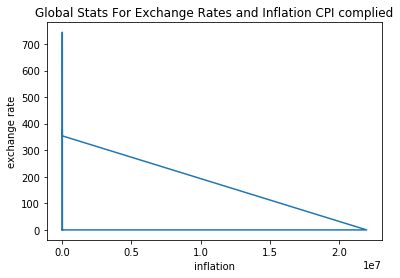

In [43]:

inflation = GCRISIS.inflation_annual_cpi
exRate = GCRISIS.exch_usd

pyplot.plot(inflation, exRate)

pyplot.title("Global Stats For Exchange Rates and Inflation CPI complied")
pyplot.xlabel("inflation")
pyplot.ylabel("exchange rate")
pyplot.show()

In [42]:
Indicators=['GDP per capita', 'Export growth (%)', 'Import growth (%)', 'Trade Balance (US$M)', 'POPULATION (millions)']

ECOINDI = pandas.DataFrame(ECOINDI, columns=['Indicator', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], index=[9, 27, 28, 87])

ECOINDI

,Indicator,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
9,GDP per capita,"790,3","976,1","1 131,80","1 310,40","1 428,00","1 428,00","1 431,70","1 440,80","1 510,80",
27,Export growth (%),"-0,90%","107,10%","40,40%","-11,80%","-4,00%","-3,50%","-2,90%","2,40%","18,00%","11,70%"
28,Import growth (%),"22,20%","87,80%","46,70%","-11,30%","1,40%","-7,00%","-4,10%","-13,70%","5,80%","28,50%"
87,POPULATION (millions),"12,2","12,3","12,5","13,1","13,4","13,7","13,9","14,3","14,6","14,9"


In [44]:
print("Zimbabwe Economic Indicators")
ECOINDI.describe()

Zimbabwe Economic Indicators


,Indicator,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,4,4,4,4,4,4,4,4,4,4,4
unique,4,4,4,4,4,4,4,4,4,4,4
top,Export growth (%),"12,2","12,3","1 131,80","-11,80%","1 428,00","13,7","1 431,70","-13,70%","1 510,80","11,70%"
freq,1,1,1,1,1,1,1,1,1,1,1


In [50]:
print("Consumer Price Index")
CPi.dropna().tail(10)


Consumer Price Index


,CPI_mt,Prd_All_Items,Inflation_Rate_Percent_Monthly,Inflation_Rate_Percent_Annual
142,Oct,"74,6","16,4","20,9"
143,Nov,"81,5","9,2",31
144,Dec,"88,8",9,"42,1"
145,None,None,None,None
146,Jan Rebased,"98,4","10,8","56,9"
147,Feb,100,"1,7","59,4"
148,Mar,"104,4","4,4","66,8"
149,Apr,"110,1","5,5","75,9"
150,May,124,"12,5","97,9"
151,Jun,"172,6","39,3","175,7"


In [52]:
print("Consumer Price Index")
CPi.describe()

Consumer Price Index


,CPI_mt,Prd_All_Items,Inflation_Rate_Percent_Monthly,Inflation_Rate_Percent_Annual
count,152,152,152,152
unique,25,66,35,74
top,None,None,None,None
freq,16,14,26,28


In [53]:
!pip install ipython-sql

%load_ext sql

%sql ibm_db_sa://bfp69501:xr2wcxn5tzkdt%40lp@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to Tinashe's Db2: ", dsn_database, "As user: ", dsn_uid, "on Host: ", dsn_hostname)

except:
    print ("Unable to connect, Logon Instance can not exceed 5! Try Again a bit later/ Read Error and contact Tinashe for Help :)", ibm_db.conn_errormsg() )

     |████████████████████████████████| 40kB 19.2MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable
Connected to Tinashe's Db2:  BLUDB As user:  bfp69501 on Host:  dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net


In [54]:
gk= %sql  SELECT * FROM ECOINDI
gk

 * ibm_db_sa://bfp69501:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


Indicator,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
None,None,None,None,None,None,None,None,None,None,None
None,None,None,None,None,None,None,None,None,None,None
None,None,None,None,None,None,None,None,None,None,None
None,None,None,None,None,None,None,None,None,None,None
None,None,None,None,None,None,None,None,None,None,None
REAL SECTOR,None,None,None,None,None,None,None,None,None,None
Real GDP at 2012 Market prices (US$' m),10 735,12 847,"14 670,00","17 114,80","17 455,30","17 870,20","18 188,30","18 325,80","19 187,80",None
Nominal GDP at Market (US$'m up to 2016),9 666,12 042,"14 101,80","17 114,80","19 091,00","19 495,50","19 963,10","20 548,70","22 813,00",None
GDP at Market Prices % changes,"5,4","19,7","14,2","16,7",2,"2,4","1,8","0,8","4,7",None
GDP per capita,"790,3","976,1","1 131,80","1 310,40","1 428,00","1 428,00","1 431,70","1 440,80","1 510,80",None


<p>ALL <b>Economic Indicators</b> that are useful for analysis <b> of Zimbabwe</b> Stats <b> using Magic SQL</b></p>

In [55]:
GDPperCapita = %sql SELECT * FROM ECONDI WHERE (Indicator = "GDP per capita")
ExportsGrow = %sql SELECT * FROM ECONDI WHERE (Indicator = "Export growth (%)")
ImportGrow = %sql SELECT * FROM ECOINDI WHERE (Indicator = "Import growth (%)")
BOP = %sql SELECT * FROM ECOINDI WHERE (Indicator = "Trade BAlance (US$M)")
Population = %sql SELECT * ECOINDI WHERE (Indicator = "POPULATION (millions)")

 * ibm_db_sa://bfp69501:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "BFP69501.ECONDI" is an undefined name.  SQLSTATE=42704 SQLCODE=-204 [SQL: 'SELECT * FROM ECONDI WHERE (Indicator = "GDP per capita")'] (Background on this error at: http://sqlalche.me/e/f405)
 * ibm_db_sa://bfp69501:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "BFP69501.ECONDI" is an undefined name.  SQLSTATE=42704 SQLCODE=-204 [SQL: 'SELECT * FROM ECONDI WHERE (Indicator = "Export growth (%)")'] (Background on this error at: http://sqlalche.me/e/f405)
 * ibm_db_sa://bfp69501:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: SQLNumRe

# Linear Regresssion Models

<p>To measure multi-collinearity between  BOP and/to Population and GDPperCapita</p>

In [80]:
x= numpy.reshape(['ExportsGrow', 'ImportGrow', 'GDPpercapita', 'Population'], -1)
y=['BOP']

In [81]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
lr.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=['ExportsGrow' 'ImportGrow' 'GDPpercapita' 'Population'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [83]:
coefficient = lr.coef_
intercept = lr.intercept_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

# Residual Plots 

Accuracy of the regression models is determined by the distribution of the data points from/around the regression line
<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

In [84]:
import seaborn as sns 
import matplotlib as plt
%matplotlib inline

In [85]:
width= 12
height= 16
plt.figure(figsize(width, height)) 
plt.title("Multi_regression Inflation and ExchangeRates")
sns.regplot(x=df['inflation'], y=df['exRate'], data =df)
plt.ylim(0,)

NameError: name 'figsize' is not defined